In [1]:
import numpy as np
import matplotlib.pyplot as plt
import platform
import matplotlib.patches as mpatches
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib import cm
from matplotlib.ticker import (MultipleLocator)
from matplotlib.colors import LogNorm
from matplotlib import colors

In [2]:
pwd

'/home/vdomcek/Dropbox/scripts/jupyter/pc'

In [3]:
cd '/home/vdomcek/Dropbox/work/2016_casa/zenodo/'

/home/vdomcek/Dropbox/work/2016_casa/zenodo


# Contents
### This jupyter lab notebook recreates Fig.9 and measures mean fluxes and spectral indices in regions
## This script requires running zenodo_casa_figures.ipynb for the region mask creation

### TODO - fraction maps for L and C band

# MASKS

In [4]:
hdu_radio_hires_lowflux_mask = fits.open('data/intermediate_products/5_mask_bin3_radio_hires_lowflux.fits')
radio_hires_lowflux_mask = hdu_radio_hires_lowflux_mask[0].data

hdu_spitzer_stars_mask = fits.open('data/intermediate_products/5_mask_bin3_spitzer_stars_daosf.fits')
spitzer_stars_mask = hdu_spitzer_stars_mask[0].data

hdu_spitzer_stars_mask_smooth = fits.open('data/intermediate_products/5_mask_bin3_spitzer_stars_smooth.fits')
spitzer_stars_mask_smooth = hdu_spitzer_stars_mask_smooth[0].data

hdu_extinction_mask = fits.open('data/intermediate_products/5_mask_bin3_nH.fits')
extinction_mask = hdu_extinction_mask[0].data

hdu_frac_mask = fits.open('data/intermediate_products/5_mask_bin3_radio_thermal_fraction.fits')
frac_mask = hdu_frac_mask[0].data

hdu_SPINBL10 = fits.open('data/intermediate_products/5_mask_bin3_alpha_R.fits')
img_SPINBL10 = hdu_SPINBL10[0].data

# hdu_radio_steep_mask = fits.open('../products/mask_mc_steep_radio.fits')
# radio_steep_mask = hdu_radio_steep_mask[0].data

the_mask = radio_hires_lowflux_mask * spitzer_stars_mask * extinction_mask * frac_mask

In [5]:
south_east_mask = fits.open('data/intermediate_products/6_analysis_mask_southeast.fits')[0].data 
arc_mask = fits.open('data/intermediate_products/6_analysis_mask_arc.fits')[0].data 
outer_rim_mask = fits.open('data/intermediate_products/6_analysis_mask_outer_rim.fits')[0].data
south_west_mask = fits.open('data/intermediate_products/6_analysis_mask_southwest.fits')[0].data 

In [6]:
hdu_L10 = fits.open('data/intermediate_products/3_L10_bin3_xheader.fits')
img_L10 = hdu_L10[0].data

hdu_L10_ferr = fits.open('../python_products/3_L10_bin3_xheader_frac.fits') # don't have script for this
img_L10_ferr = hdu_L10_ferr[0].data

hdu_C10 = fits.open('data/intermediate_products/3_C10_bin3_xheader.fits')
img_C10 = hdu_C10[0].data

hdu_C10_ferr = fits.open('../python_products/3_C10_bin3_xheader_frac.fits') # don't have script for this
img_C10_ferr = hdu_C10_ferr[0].data

# img_Hires_nomask = fits.open('data/intermediate_products//3_Hires_bin3_xheader_fluxed_2009.fits')[0].data
hdu_Hires = fits.open('data/final_products/alpha_RIR_high-res/radio_flux_median_masked.fits')
img_Hires = hdu_Hires[0].data

hdu_Hires_err = fits.open('data/final_products/alpha_RIR_high-res/radio_flux_err_masked.fits')
img_Hires_err = hdu_Hires_err[0].data

hdu_Spitzer = fits.open('data/final_products/alpha_RIR_high-res/spitzer_flux_median_masked.fits')
img_Spitzer = hdu_Spitzer[0].data

hdu_Spitzer_err = fits.open('data/final_products/alpha_RIR_high-res/spitzer_flux_err_masked.fits')
img_Spitzer_err = hdu_Spitzer_err[0].data

hdu_smo_Hires = fits.open('data/final_products/alpha_RIR_low-res/radio_flux_median_lowres_masked.fits')
img_smo_Hires = hdu_smo_Hires[0].data

hdu_smo_Hires_err = fits.open('data/final_products/alpha_RIR_low-res/radio_flux_err_lowres_masked.fits')
img_smo_Hires_err = hdu_smo_Hires_err[0].data

hdu_smo_Spitzer = fits.open('data/final_products/alpha_RIR_low-res/spitzer_flux_median_lowres_masked.fits')
img_smo_Spitzer = hdu_smo_Spitzer[0].data

hdu_smo_Spitzer_err = fits.open('data/final_products/alpha_RIR_low-res/spitzer_flux_err_lowres_masked.fits')
img_smo_Spitzer_err = hdu_smo_Spitzer_err[0].data


hdu_chandra = fits.open('data/intermediate_products//1_chandra_bin3_4.2-6.2_flux_jy.fits')
img_chandra = hdu_chandra[0].data



In [7]:
frequencies = np.array([1.285e9, 4.64e9, 4.72e9, 8.327568277778e13 ])

In [8]:
alpha_R_IR = fits.open('data/final_products/alpha_RIR_high-res/alpha_R-IR_median_masked.fits')[0].data
alpha_R_IR_err = fits.open('data/final_products/alpha_RIR_high-res/alpha_R-IR_err_masked.fits')[0].data

In [9]:
alpha_R_IR_smo = fits.open('data/final_products/alpha_RIR_low-res/alpha_R-IR_median_lowres_masked.fits')[0].data
alpha_R_IR_err_smo = fits.open('data/final_products/alpha_RIR_low-res/alpha_R-IR_err_lowres_masked.fits')[0].data

In [10]:
alpha_R = fits.open('data/final_products/alpha_radio//3_SPIXBL10CORR_bin3_xheader.fits')[0].data
alpha_R_err = fits.open('data/final_products/alpha_radio//3_SPIXERR10_bin3_xheader.fits')[0].data

/home/vdomcek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greys"))


<Figure size 432x288 with 0 Axes>

/home/vdomcek/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/home/vdomcek/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)


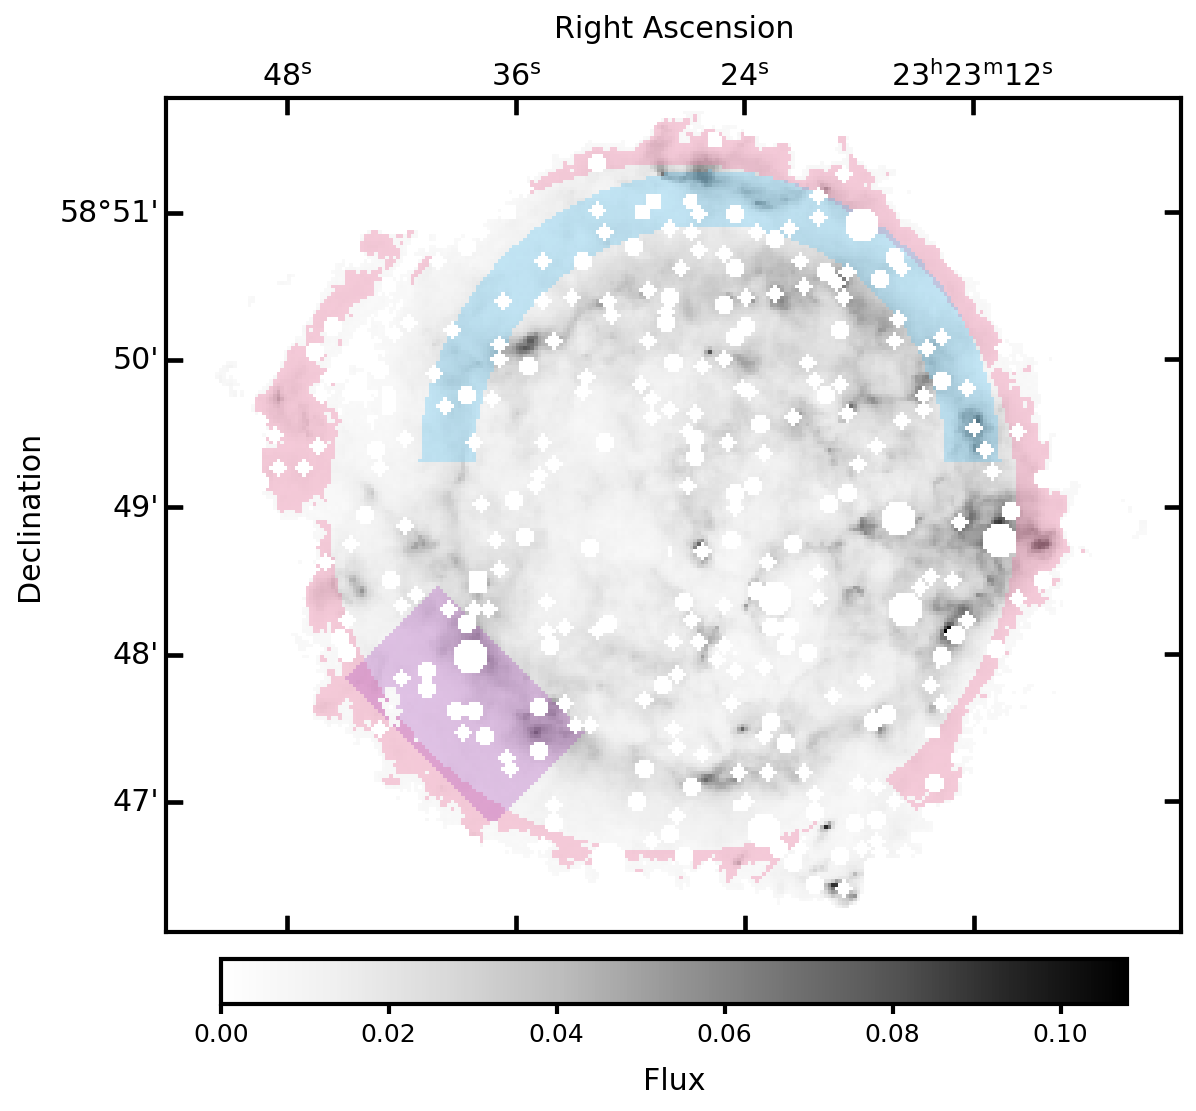

In [11]:
from matplotlib import cm
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
          'figure.dpi': 150,
          'axes.linewidth': 2
         }

plt.clf()
fig = plt.figure(figsize=(14,8),dpi=150)
plt.rcParams.update(params)

ax1 = plt.subplot(111, projection=WCS(hdu_L10[0].header))
cmap = cm.get_cmap('Greys')
cmap.set_bad(color='white')

im = ax1.imshow(img_Hires, cmap=cmap)

cmap2 = colors.ListedColormap(['#F06292'])
im3 = ax1.imshow(outer_rim_mask, origin='lower', cmap=cmap2, vmin=1, vmax=2.5, alpha=0.3, label='Forward shock')

cmap3 = colors.ListedColormap(['#4FC3F7'])
im4 = ax1.imshow(arc_mask, origin='lower',cmap=cmap3, vmin=0.6, vmax=2., alpha=0.3, label='Northern arc')

cmap4 = colors.ListedColormap(['#AB47BC'])
im2 = ax1.imshow(south_east_mask, origin='lower',cmap=cmap4, vmin=0, vmax=2.5, alpha=0.3, label='Dark spot')

cbar = fig.colorbar(im, ax=ax1, fraction=0.05, pad=0.03, orientation="horizontal") 
cbar.set_label(r'Flux', rotation=0, labelpad=10,fontsize='x-large')
cbar.ax.tick_params(labelsize='large')
cbar.ax.tick_params(labelsize='large', which='major', length=5, width=2)
cbar.ax.tick_params(labelsize='large', which='minor', length=3, width=2)
ax1.set_xlim(100, 380)
ax1.set_ylim(140, 370)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['ra'].set_axislabel_position('top')
ax1.coords['ra'].set_ticklabel_position('top')
ax1.coords['dec'].set_axislabel('Declination')
ax1.tick_params(axis='x', which='major', width=2.00, length=8, direction='in', labelsize='x-large', top=True,
               bottom=True)
ax1.tick_params(axis='y', which='major', width=2.00, length=8, direction='in', labelsize='x-large', right=True,
               left=True)
ax1.tick_params(axis='both', which='minor', length=4)
# ax1.contour(img_Hires_nomask, levels=[5e-3, 0.030], colors='red', alpha=0.7)
plt.show()


In [12]:
def pl_index(flux1,flux2,vnu1,vnu2):
    return (np.log10(flux2)-np.log10(flux1)) / (np.log10(vnu2)-np.log10(vnu1))

In [13]:
def calc_mean_radio(current_mask, image, frac_image):
    num_sim=10000
    result_matrix = np.zeros(num_sim)
    for x in range(len(image[0])-1):
        for y in range(len(image)-1):
            if np.isnan(current_mask[y, x]): continue
            result_matrix = result_matrix + np.random.choice(np.random.normal(image[y,x], frac_image[y,x]*image[y,x], num_sim), num_sim, replace=True)
    result_matrix = result_matrix/np.nansum(current_mask) 
    return result_matrix

def calc_mean_midir(current_mask, image, err_image):
    num_sim=10000
    result_matrix = np.zeros(num_sim)
    for x in range(len(image[0])-1):
        for y in range(len(image)-1):
            if np.isnan(current_mask[y, x]): continue
            result_matrix = result_matrix + np.random.choice(np.random.normal(image[y,x], err_image[y,x], num_sim), num_sim, replace=True)
    result_matrix = result_matrix/np.nansum(current_mask) 
    return result_matrix

### Southeast

In [14]:
current_mask = the_mask*south_east_mask
L10_flux_matrix = calc_mean_radio(current_mask, img_L10, img_L10_ferr)
C10_flux_matrix = calc_mean_radio(current_mask, img_C10, img_C10_ferr)
hires_flux_matrix = calc_mean_midir(current_mask, img_Hires, img_Hires_err)
spitzer_flux_matrix = calc_mean_midir(current_mask, img_Spitzer, img_Spitzer_err)

smo_hires_flux_matrix = calc_mean_midir(current_mask, img_smo_Hires, img_smo_Hires_err)
smo_spitzer_flux_matrix = calc_mean_midir(current_mask, img_smo_Spitzer, img_smo_Spitzer_err)

print("Flux L10 = {:.7f} ± {:.7f}".format(np.nanmedian(L10_flux_matrix), np.nanstd(L10_flux_matrix)))
print("Flux C10 = {:.7f} ± {:.7f}".format(np.nanmedian(C10_flux_matrix), np.nanstd(C10_flux_matrix)))
print("Flux Hires = {:.7f} ± {:.7f}".format(np.nanmedian(hires_flux_matrix), np.nanstd(hires_flux_matrix)))
print("Flux Spitzer = {:.7f} ± {:.7f}".format(np.nanmedian(spitzer_flux_matrix), np.nanstd(spitzer_flux_matrix)))

print("Flux smo Hires = {:.7f} ± {:.7f}".format(np.nanmedian(smo_hires_flux_matrix), np.nanstd(smo_hires_flux_matrix)))
print("Flux smo Spitzer = {:.7f} ± {:.7f}".format(np.nanmedian(smo_spitzer_flux_matrix), np.nanstd(smo_spitzer_flux_matrix)))

Flux L10 = 0.0569068 ± 0.0000505
Flux C10 = 0.0209156 ± 0.0000146
Flux Hires = 0.0194509 ± 0.0000546
Flux Spitzer = 0.0000312 ± 0.0000002
Flux smo Hires = 0.0191461 ± 0.0000522
Flux smo Spitzer = 0.0000291 ± 0.0000002


In [15]:
flux1, flux2 = L10_flux_matrix, C10_flux_matrix
vnu1, vnu2 = frequencies[0:2]
hist_radio = pl_index(flux1,flux2,vnu1,vnu2)

flux1, flux2 = hires_flux_matrix, spitzer_flux_matrix
vnu1, vnu2 = frequencies[2:4]
hist_midIR = pl_index(flux1,flux2,vnu1,vnu2)

flux1, flux2 = smo_hires_flux_matrix, smo_spitzer_flux_matrix
vnu1, vnu2 = frequencies[2:4]
hist_midIR_smo = pl_index(flux1,flux2,vnu1,vnu2)

Delta Alpha = 0.12143 ± 0.00107


<Figure size 900x600 with 0 Axes>

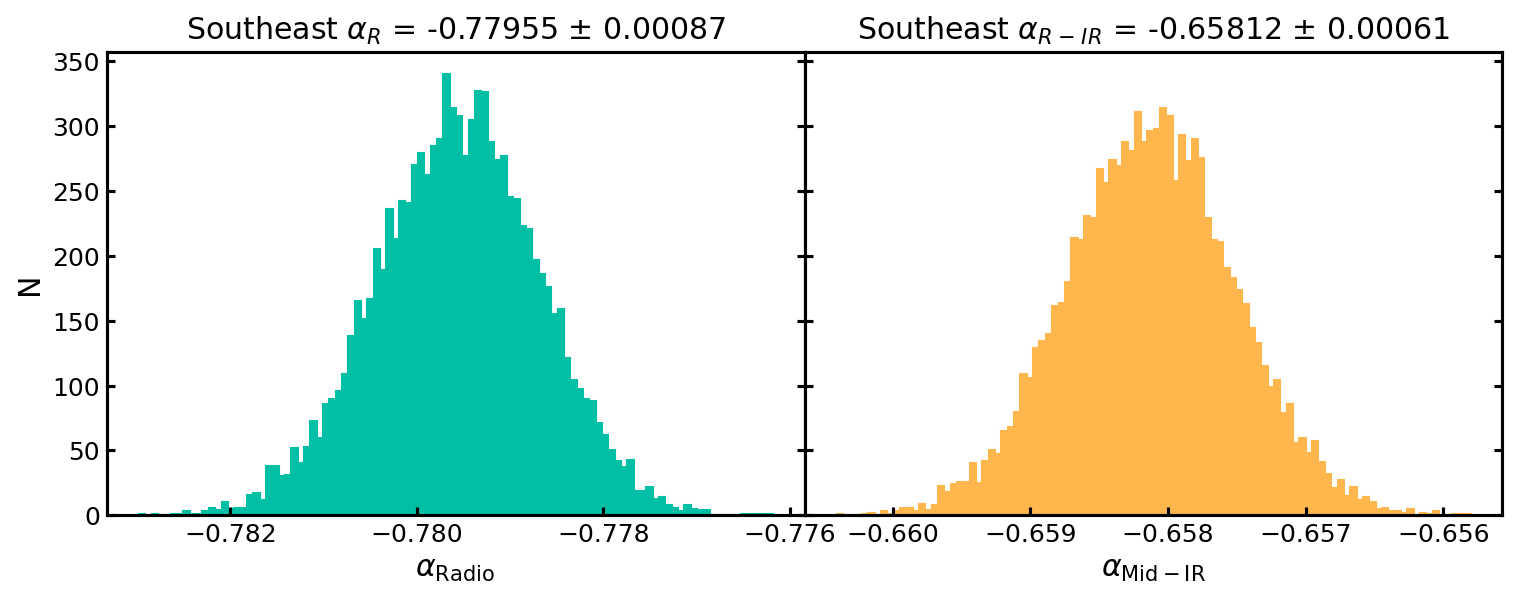

In [16]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.dpi': 150,
          'axes.linewidth': 1.5
         }
plt.rcParams.update(params)

plt.clf()

fig = plt.figure(figsize=(12,9))

ax10 = plt.subplot(221)            
ax10.hist(hist_radio, bins=100,color='#00BFA5', edgecolor='#00BFA5')
ax10.set_title(r'Southeast $\alpha _R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_radio), np.nanstd(hist_radio)))
ax10.set_xlabel(r'$\alpha _\mathrm{Radio}$ ',size='x-large')
ax10.xaxis.set_major_locator(MultipleLocator(0.002))
ax10.set_ylabel(r'N',size='x-large')

ax20 = plt.subplot(222, sharey = ax10)            
ax20.hist(hist_midIR, bins=100, color='#FFB74D', edgecolor='#FFB74D')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax20.set_title(r'Southeast $\alpha _R $$_-$$_I$$_R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR), np.nanstd(hist_midIR)))
ax20.set_xlabel(r'$\alpha _\mathrm{Mid-IR}$',size='x-large')
ax20.xaxis.set_major_locator(MultipleLocator(0.001))

plt.subplots_adjust(wspace=0.)
plt.setp(ax20.get_yticklabels(), visible=False)
ax10.tick_params(axis='both', which='major', width=1.5, length=4, direction='in', right=True, left=True)
ax20.tick_params(axis='both', which='major', width=1.5, length=4, direction='in',  right=True, left=True)
print('Delta Alpha = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR - hist_radio), np.nanstd(hist_midIR - hist_radio)))

Delta Alpha = 0.00543


<Figure size 900x600 with 0 Axes>

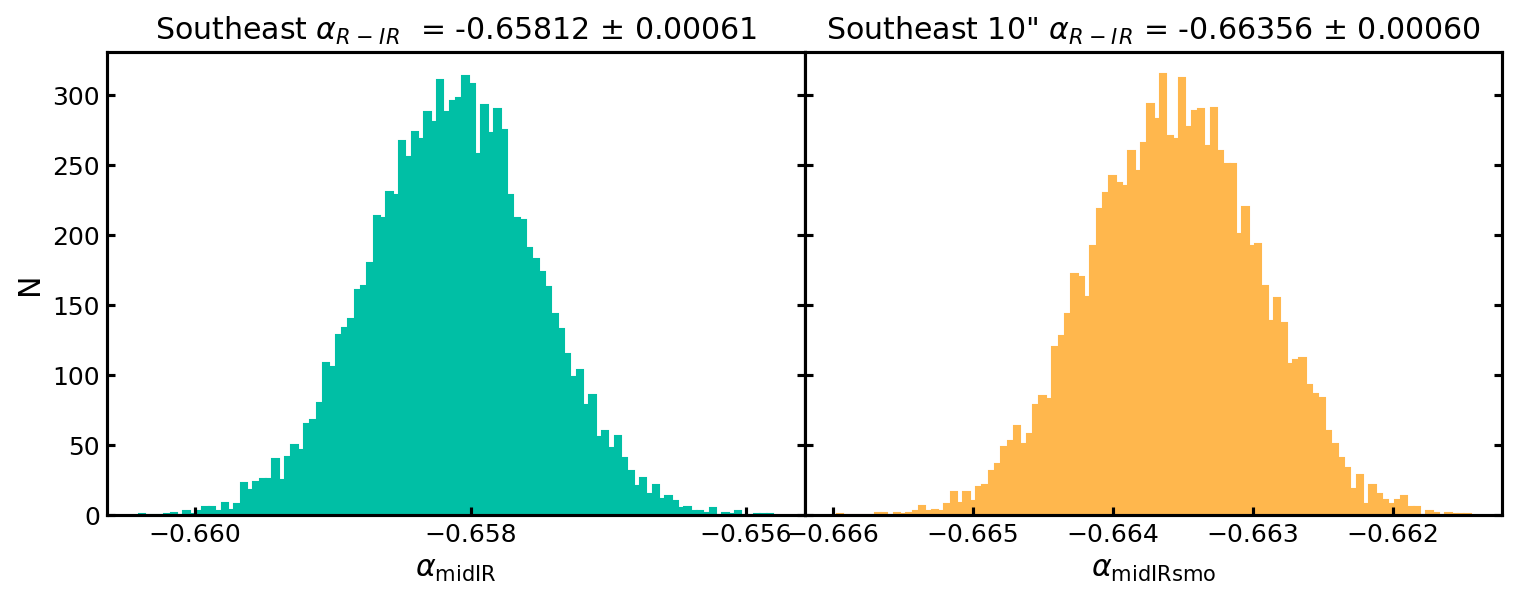

In [17]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.dpi': 150,
          'axes.linewidth': 1.5
         }
plt.rcParams.update(params)

plt.clf()

fig = plt.figure(figsize=(12,9))

ax10 = plt.subplot(221)            
ax10.hist(hist_midIR, bins=100,color='#00BFA5', edgecolor='#00BFA5')
ax10.set_title(r'Southeast $\alpha _R$$_-$$_I$$_R$  = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR), np.nanstd(hist_midIR)))
ax10.set_xlabel(r'$\alpha _\mathrm{midIR}$ ',size='x-large')
ax10.xaxis.set_major_locator(MultipleLocator(0.002))
ax10.set_ylabel(r'N',size='x-large')

ax20 = plt.subplot(222, sharey = ax10)            
ax20.hist(hist_midIR_smo, bins=100, color='#FFB74D', edgecolor='#FFB74D')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax20.set_title(r'Southeast 10" $\alpha _R $$_-$$_I$$_R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR_smo), np.nanstd(hist_midIR_smo)))
ax20.set_xlabel(r'$\alpha _\mathrm{midIR smo}$',size='x-large')
ax20.xaxis.set_major_locator(MultipleLocator(0.001))

plt.subplots_adjust(wspace=0.)
plt.setp(ax20.get_yticklabels(), visible=False)
ax10.tick_params(axis='both', which='major', width=1.5, length=4, direction='in', right=True, left=True)
ax20.tick_params(axis='both', which='major', width=1.5, length=4, direction='in',  right=True, left=True)
print('Delta Alpha = {:.5f}'.format(np.nanmedian(hist_midIR - hist_midIR_smo)))

In [18]:
flux_L10_south_east_mean, flux_L10_south_east_std = np.nanmean(L10_flux_matrix), np.nanstd(L10_flux_matrix)
flux_C10_south_east_mean, flux_C10_south_east_std = np.nanmean(C10_flux_matrix), np.nanstd(C10_flux_matrix)
flux_hires_south_east_mean, flux_hires_south_east_std = np.nanmean(hires_flux_matrix), np.nanstd(hires_flux_matrix)
flux_spitzer_south_east_mean, flux_spitzer_south_east_std = np.nanmean(spitzer_flux_matrix), np.nanstd(spitzer_flux_matrix)

In [19]:
vnu1, vnu2 = frequencies[2:4]
alpha_mean_se = pl_index(flux_hires_south_east_mean, flux_spitzer_south_east_mean, vnu1, vnu2)

# Outer rim

In [20]:
current_mask = the_mask*outer_rim_mask
L10_flux_matrix = calc_mean_radio(current_mask, img_L10, img_L10_ferr)
C10_flux_matrix = calc_mean_radio(current_mask, img_C10, img_C10_ferr)
hires_flux_matrix = calc_mean_midir(current_mask, img_Hires, img_Hires_err)
spitzer_flux_matrix = calc_mean_midir(current_mask, img_Spitzer, img_Spitzer_err)

smo_hires_flux_matrix = calc_mean_midir(current_mask, img_smo_Hires, img_smo_Hires_err)
smo_spitzer_flux_matrix = calc_mean_midir(current_mask, img_smo_Spitzer, img_smo_Spitzer_err)

print("Flux L10 = {:.7f} ± {:.7f}".format(np.nanmedian(L10_flux_matrix), np.nanstd(L10_flux_matrix)))
print("Flux C10 = {:.7f} ± {:.7f}".format(np.nanmedian(C10_flux_matrix), np.nanstd(C10_flux_matrix)))
print("Flux Hires = {:.7f} ± {:.7f}".format(np.nanmedian(hires_flux_matrix), np.nanstd(hires_flux_matrix)))
print("Flux Spitzer = {:.7f} ± {:.7f}".format(np.nanmedian(spitzer_flux_matrix), np.nanstd(spitzer_flux_matrix)))

print("Flux smo Hires = {:.7f} ± {:.7f}".format(np.nanmedian(smo_hires_flux_matrix), np.nanstd(smo_hires_flux_matrix)))
print("Flux smo Spitzer = {:.7f} ± {:.7f}".format(np.nanmedian(smo_spitzer_flux_matrix), np.nanstd(smo_spitzer_flux_matrix)))

flux1, flux2 = L10_flux_matrix, C10_flux_matrix
vnu1, vnu2 = frequencies[0:2]
hist_radio = pl_index(flux1,flux2,vnu1,vnu2)

flux1, flux2 = hires_flux_matrix, spitzer_flux_matrix
vnu1, vnu2 = frequencies[2:4]
hist_midIR = pl_index(flux1,flux2,vnu1,vnu2)

flux1, flux2 = smo_hires_flux_matrix, smo_spitzer_flux_matrix
vnu1, vnu2 = frequencies[2:4]
hist_midIR_smo = pl_index(flux1,flux2,vnu1,vnu2)

Flux L10 = 0.0369798 ± 0.0000331
Flux C10 = 0.0136235 ± 0.0000096
Flux Hires = 0.0130026 ± 0.0000246
Flux Spitzer = 0.0000341 ± 0.0000002
Flux smo Hires = 0.0124694 ± 0.0000227
Flux smo Spitzer = 0.0000313 ± 0.0000001


Delta Alpha = 0.16989 ± 0.00102


<Figure size 900x600 with 0 Axes>

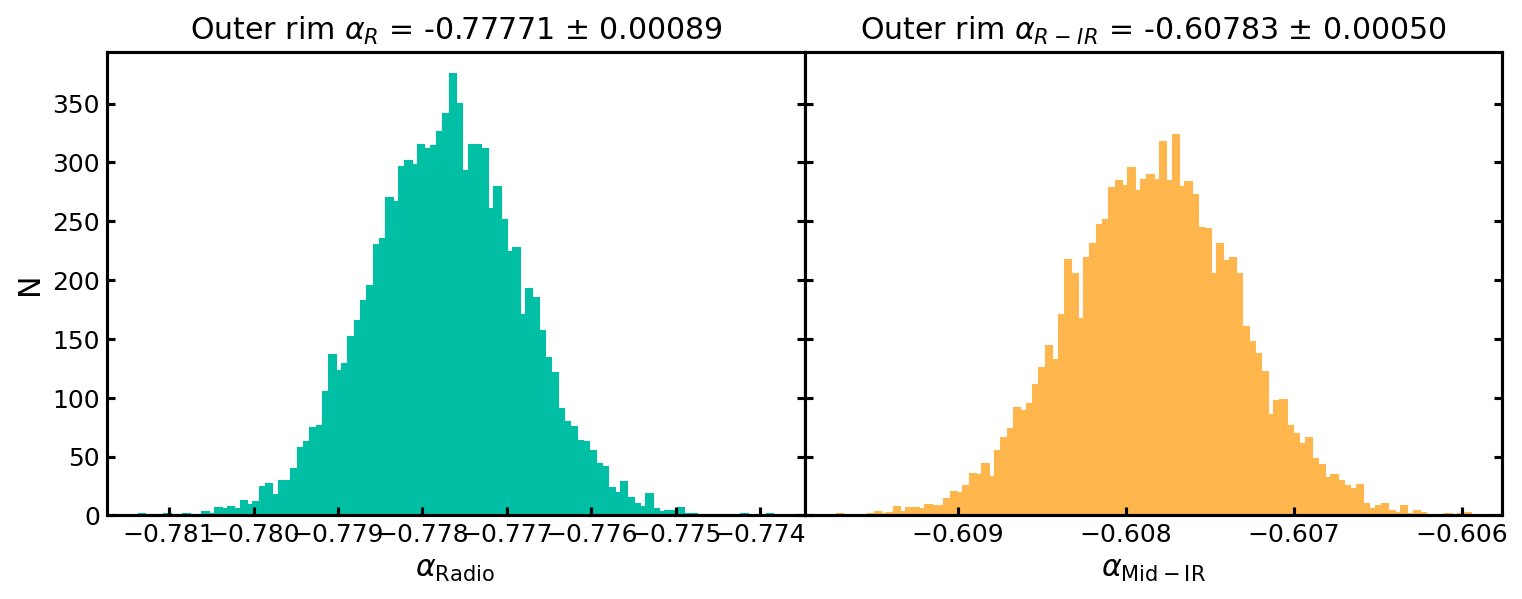

In [21]:
plt.clf()

fig = plt.figure(figsize=(12,9))

ax10 = plt.subplot(221)            
ax10.hist(hist_radio, bins=100,color='#00BFA5', edgecolor='#00BFA5')
ax10.set_title(r'Outer rim $\alpha _R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_radio), np.nanstd(hist_radio)))
ax10.set_xlabel(r'$\alpha _\mathrm{Radio}$ ',size='x-large')
# ax10.xaxis.set_major_locator(MultipleLocator(0.001))
ax10.set_ylabel(r'N',size='x-large')

ax20 = plt.subplot(222, sharey = ax10)            
ax20.hist(hist_midIR, bins=100, color='#FFB74D', edgecolor='#FFB74D')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax20.xaxis.set_major_locator(MultipleLocator(0.001))
ax20.set_title(r'Outer rim $\alpha _R $$_-$$_I$$_R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR), np.nanstd(hist_midIR)))
ax20.set_xlabel(r'$\alpha _\mathrm{Mid-IR}$',size='x-large')

plt.subplots_adjust(wspace=0.)
plt.setp(ax20.get_yticklabels(), visible=False)
ax10.tick_params(axis='both', which='major', width=1.5, length=4, direction='in', right=True, left=True)
ax20.tick_params(axis='both', which='major', width=1.5, length=4, direction='in',  right=True, left=True)
print('Delta Alpha = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR - hist_radio), np.nanstd(hist_midIR - hist_radio)))

Delta Alpha = 0.00449


<Figure size 900x600 with 0 Axes>

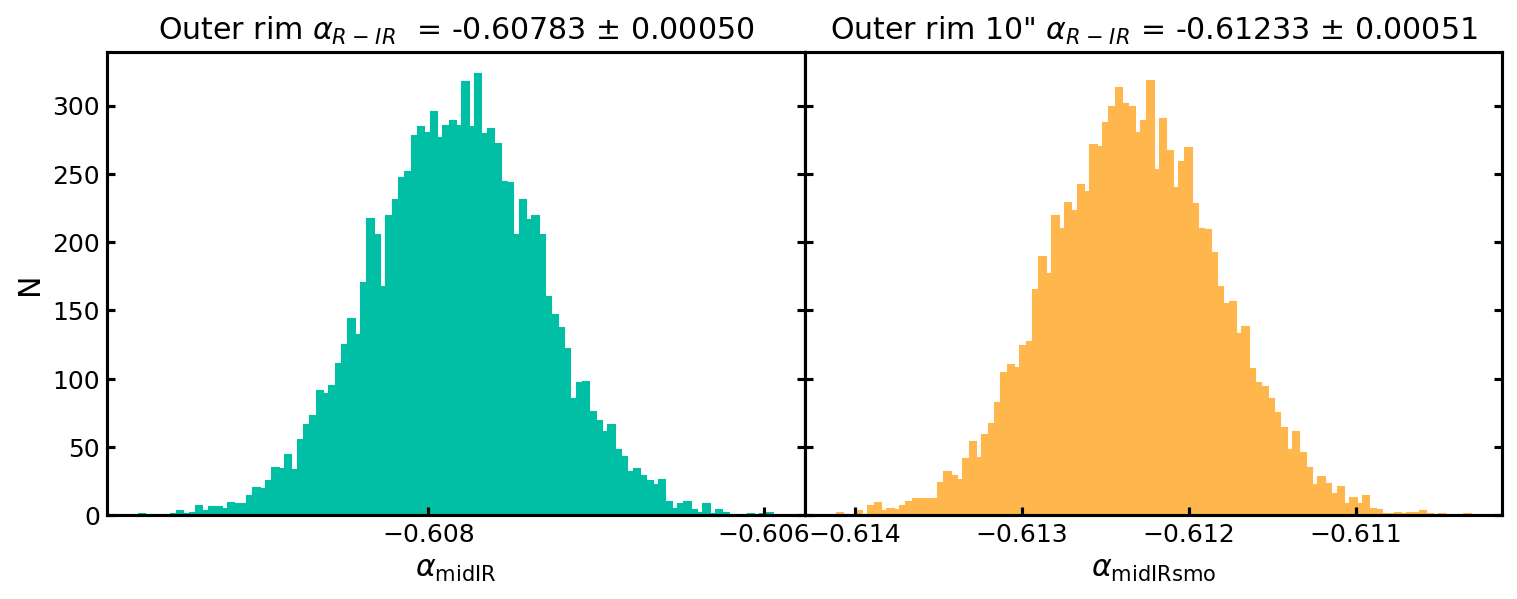

In [22]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.dpi': 150,
          'axes.linewidth': 1.5
         }
plt.rcParams.update(params)

plt.clf()

fig = plt.figure(figsize=(12,9))

ax10 = plt.subplot(221)            
ax10.hist(hist_midIR, bins=100,color='#00BFA5', edgecolor='#00BFA5')
ax10.set_title(r'Outer rim $\alpha _R$$_-$$_I$$_R$  = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR), np.nanstd(hist_midIR)))
ax10.set_xlabel(r'$\alpha _\mathrm{midIR}$ ',size='x-large')
ax10.xaxis.set_major_locator(MultipleLocator(0.002))
ax10.set_ylabel(r'N',size='x-large')

ax20 = plt.subplot(222, sharey = ax10)            
ax20.hist(hist_midIR_smo, bins=100, color='#FFB74D', edgecolor='#FFB74D')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax20.set_title(r'Outer rim 10" $\alpha _R $$_-$$_I$$_R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR_smo), np.nanstd(hist_midIR_smo)))
ax20.set_xlabel(r'$\alpha _\mathrm{midIR smo}$',size='x-large')
ax20.xaxis.set_major_locator(MultipleLocator(0.001))

plt.subplots_adjust(wspace=0.)
plt.setp(ax20.get_yticklabels(), visible=False)
ax10.tick_params(axis='both', which='major', width=1.5, length=4, direction='in', right=True, left=True)
ax20.tick_params(axis='both', which='major', width=1.5, length=4, direction='in',  right=True, left=True)
print('Delta Alpha = {:.5f}'.format(np.nanmedian(hist_midIR - hist_midIR_smo)))

In [23]:
flux_L10_outer_rim_mean, flux_L10_outer_rim_std = np.nanmean(L10_flux_matrix), np.nanstd(L10_flux_matrix)
flux_C10_outer_rim_mean, flux_C10_outer_rim_std = np.nanmean(C10_flux_matrix), np.nanstd(C10_flux_matrix)
flux_hires_outer_rim_mean, flux_hires_outer_rim_std = np.nanmean(hires_flux_matrix), np.nanstd(hires_flux_matrix)
flux_spitzer_outer_rim_mean, flux_spitzer_outer_rim_std = np.nanmean(spitzer_flux_matrix), np.nanstd(spitzer_flux_matrix)

In [24]:
vnu1, vnu2 = frequencies[2:4]
alpha_mean_or = pl_index(flux_hires_outer_rim_mean, flux_spitzer_outer_rim_mean, vnu1, vnu2)

### Arc

In [25]:
current_mask = the_mask*arc_mask*frac_mask
L10_flux_matrix = calc_mean_radio(current_mask, img_L10, img_L10_ferr)
C10_flux_matrix = calc_mean_radio(current_mask, img_C10, img_C10_ferr)
hires_flux_matrix = calc_mean_midir(current_mask, img_Hires, img_Hires_err)
spitzer_flux_matrix = calc_mean_midir(current_mask, img_Spitzer, img_Spitzer_err)

smo_hires_flux_matrix = calc_mean_midir(current_mask, img_smo_Hires, img_smo_Hires_err)
smo_spitzer_flux_matrix = calc_mean_midir(current_mask, img_smo_Spitzer, img_smo_Spitzer_err)

print("Flux L10 = {:.7f} ± {:.7f}".format(np.nanmedian(L10_flux_matrix), np.nanstd(L10_flux_matrix)))
print("Flux C10 = {:.7f} ± {:.7f}".format(np.nanmedian(C10_flux_matrix), np.nanstd(C10_flux_matrix)))
print("Flux Hires = {:.7f} ± {:.7f}".format(np.nanmedian(hires_flux_matrix), np.nanstd(hires_flux_matrix)))
print("Flux Spitzer = {:.7f} ± {:.7f}".format(np.nanmedian(spitzer_flux_matrix), np.nanstd(spitzer_flux_matrix)))

print("Flux smo Hires = {:.7f} ± {:.7f}".format(np.nanmedian(smo_hires_flux_matrix), np.nanstd(smo_hires_flux_matrix)))
print("Flux smo Spitzer = {:.7f} ± {:.7f}".format(np.nanmedian(smo_spitzer_flux_matrix), np.nanstd(smo_spitzer_flux_matrix)))

flux1, flux2 = L10_flux_matrix, C10_flux_matrix
vnu1, vnu2 = frequencies[0:2]
hist_radio = pl_index(flux1,flux2,vnu1,vnu2)

flux1, flux2 = hires_flux_matrix, spitzer_flux_matrix
vnu1, vnu2 = frequencies[2:4]
hist_midIR = pl_index(flux1,flux2,vnu1,vnu2)

flux1, flux2 = smo_hires_flux_matrix, smo_spitzer_flux_matrix
vnu1, vnu2 = frequencies[2:4]
hist_midIR_smo = pl_index(flux1,flux2,vnu1,vnu2)

Flux L10 = 0.0654678 ± 0.0000385
Flux C10 = 0.0242291 ± 0.0000112
Flux Hires = 0.0215068 ± 0.0000430
Flux Spitzer = 0.0000421 ± 0.0000001
Flux smo Hires = 0.0214762 ± 0.0000418
Flux smo Spitzer = 0.0000402 ± 0.0000001


Delta Alpha = 0.13641 ± 0.00071


<Figure size 900x600 with 0 Axes>

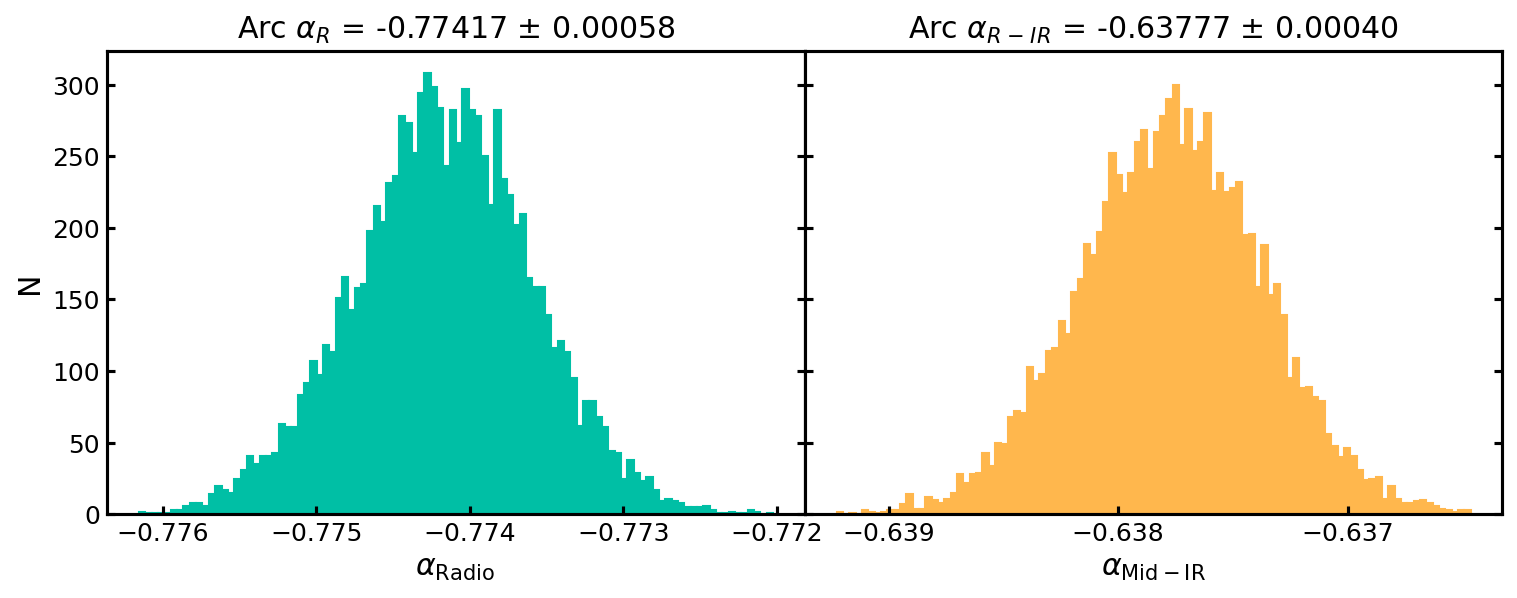

In [26]:
plt.clf()

fig = plt.figure(figsize=(12,9))

ax10 = plt.subplot(221)            
ax10.hist(hist_radio, bins=100,color='#00BFA5', edgecolor='#00BFA5')
ax10.set_title(r'Arc $\alpha _R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_radio), np.nanstd(hist_radio)))
ax10.set_xlabel(r'$\alpha _\mathrm{Radio}$ ',size='x-large')
# ax10.xaxis.set_major_locator(MultipleLocator(0.001))
ax10.set_ylabel(r'N',size='x-large')

ax20 = plt.subplot(222, sharey = ax10)            
ax20.hist(hist_midIR, bins=100, color='#FFB74D', edgecolor='#FFB74D')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax20.xaxis.set_major_locator(MultipleLocator(0.001))
ax20.set_title(r'Arc $\alpha _R $$_-$$_I$$_R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR), np.nanstd(hist_midIR)))
ax20.set_xlabel(r'$\alpha _\mathrm{Mid-IR}$',size='x-large')

plt.subplots_adjust(wspace=0.)
plt.setp(ax20.get_yticklabels(), visible=False)
ax10.tick_params(axis='both', which='major', width=1.5, length=4, direction='in', right=True, left=True)
ax20.tick_params(axis='both', which='major', width=1.5, length=4, direction='in',  right=True, left=True)
print('Delta Alpha = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR - hist_radio), np.nanstd(hist_midIR - hist_radio)))

Delta Alpha = 0.00449


<Figure size 900x600 with 0 Axes>

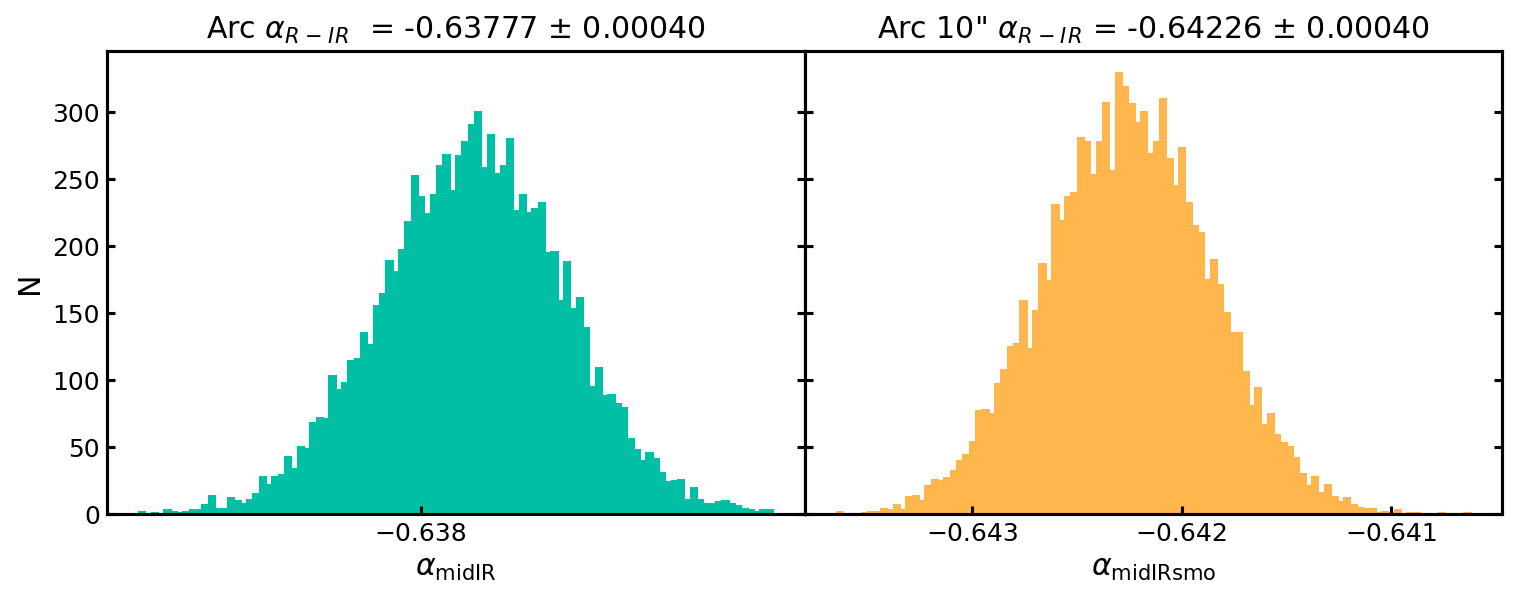

In [27]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.dpi': 150,
          'axes.linewidth': 1.5
         }
plt.rcParams.update(params)

plt.clf()

fig = plt.figure(figsize=(12,9))

ax10 = plt.subplot(221)            
ax10.hist(hist_midIR, bins=100,color='#00BFA5', edgecolor='#00BFA5')
ax10.set_title(r'Arc $\alpha _R$$_-$$_I$$_R$  = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR), np.nanstd(hist_midIR)))
ax10.set_xlabel(r'$\alpha _\mathrm{midIR}$ ',size='x-large')
ax10.xaxis.set_major_locator(MultipleLocator(0.002))
ax10.set_ylabel(r'N',size='x-large')

ax20 = plt.subplot(222, sharey = ax10)            
ax20.hist(hist_midIR_smo, bins=100, color='#FFB74D', edgecolor='#FFB74D')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax20.set_title(r'Arc 10" $\alpha _R $$_-$$_I$$_R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR_smo), np.nanstd(hist_midIR_smo)))
ax20.set_xlabel(r'$\alpha _\mathrm{midIR smo}$',size='x-large')
ax20.xaxis.set_major_locator(MultipleLocator(0.001))

plt.subplots_adjust(wspace=0.)
plt.setp(ax20.get_yticklabels(), visible=False)
ax10.tick_params(axis='both', which='major', width=1.5, length=4, direction='in', right=True, left=True)
ax20.tick_params(axis='both', which='major', width=1.5, length=4, direction='in',  right=True, left=True)
print('Delta Alpha = {:.5f}'.format(np.nanmedian(hist_midIR - hist_midIR_smo)))

In [28]:
flux_L10_arc_mean, flux_L10_arc_std = np.nanmean(L10_flux_matrix), np.nanstd(L10_flux_matrix)
flux_C10_arc_mean, flux_C10_arc_std = np.nanmean(C10_flux_matrix), np.nanstd(C10_flux_matrix)
flux_hires_arc_mean, flux_hires_arc_std =  np.nanmean(hires_flux_matrix), np.nanstd(hires_flux_matrix)
flux_spitzer_arc_mean, flux_spitzer_arc_std = np.nanmean(spitzer_flux_matrix), np.nanstd(spitzer_flux_matrix)

In [29]:
vnu1, vnu2 = frequencies[2:4]
alpha_mean_arc = pl_index(flux_hires_arc_mean, flux_spitzer_arc_mean, vnu1, vnu2)

### Whole

In [30]:
current_mask = the_mask * frac_mask
L10_flux_matrix = calc_mean_radio(current_mask, img_L10, img_L10_ferr)
C10_flux_matrix = calc_mean_radio(current_mask, img_C10, img_C10_ferr)
hires_flux_matrix = calc_mean_midir(current_mask, img_Hires, img_Hires_err)
spitzer_flux_matrix = calc_mean_midir(current_mask, img_Spitzer, img_Spitzer_err)


smo_hires_flux_matrix = calc_mean_midir(current_mask, img_smo_Hires, img_smo_Hires_err)
smo_spitzer_flux_matrix = calc_mean_midir(current_mask, img_smo_Spitzer, img_smo_Spitzer_err)

print("Flux L10 = {:.7f} ± {:.7f}".format(np.nanmedian(L10_flux_matrix), np.nanstd(L10_flux_matrix)))
print("Flux C10 = {:.7f} ± {:.7f}".format(np.nanmedian(C10_flux_matrix), np.nanstd(C10_flux_matrix)))
print("Flux Hires = {:.7f} ± {:.7f}".format(np.nanmedian(hires_flux_matrix), np.nanstd(hires_flux_matrix)))
print("Flux Spitzer = {:.7f} ± {:.7f}".format(np.nanmedian(spitzer_flux_matrix), np.nanstd(spitzer_flux_matrix)))

print("Flux smo Hires = {:.7f} ± {:.7f}".format(np.nanmedian(smo_hires_flux_matrix), np.nanstd(smo_hires_flux_matrix)))
print("Flux smo Spitzer = {:.7f} ± {:.7f}".format(np.nanmedian(smo_spitzer_flux_matrix), np.nanstd(smo_spitzer_flux_matrix)))

flux1, flux2 = L10_flux_matrix, C10_flux_matrix
vnu1, vnu2 = frequencies[0:2]
hist_radio = pl_index(flux1,flux2,vnu1,vnu2)

flux1, flux2 = hires_flux_matrix, spitzer_flux_matrix
vnu1, vnu2 = frequencies[2:4]
hist_midIR = pl_index(flux1,flux2,vnu1,vnu2)

flux1, flux2 = smo_hires_flux_matrix, smo_spitzer_flux_matrix
vnu1, vnu2 = frequencies[2:4]
hist_midIR_smo = pl_index(flux1,flux2,vnu1,vnu2)

Flux L10 = 0.0586103 ± 0.0000125
Flux C10 = 0.0219419 ± 0.0000036
Flux Hires = 0.0196030 ± 0.0000129
Flux Spitzer = 0.0000469 ± 0.0000001
Flux smo Hires = 0.0195234 ± 0.0000125
Flux smo Spitzer = 0.0000442 ± 0.0000001


Delta Alpha = 0.14793 ± 0.00026


<Figure size 900x600 with 0 Axes>

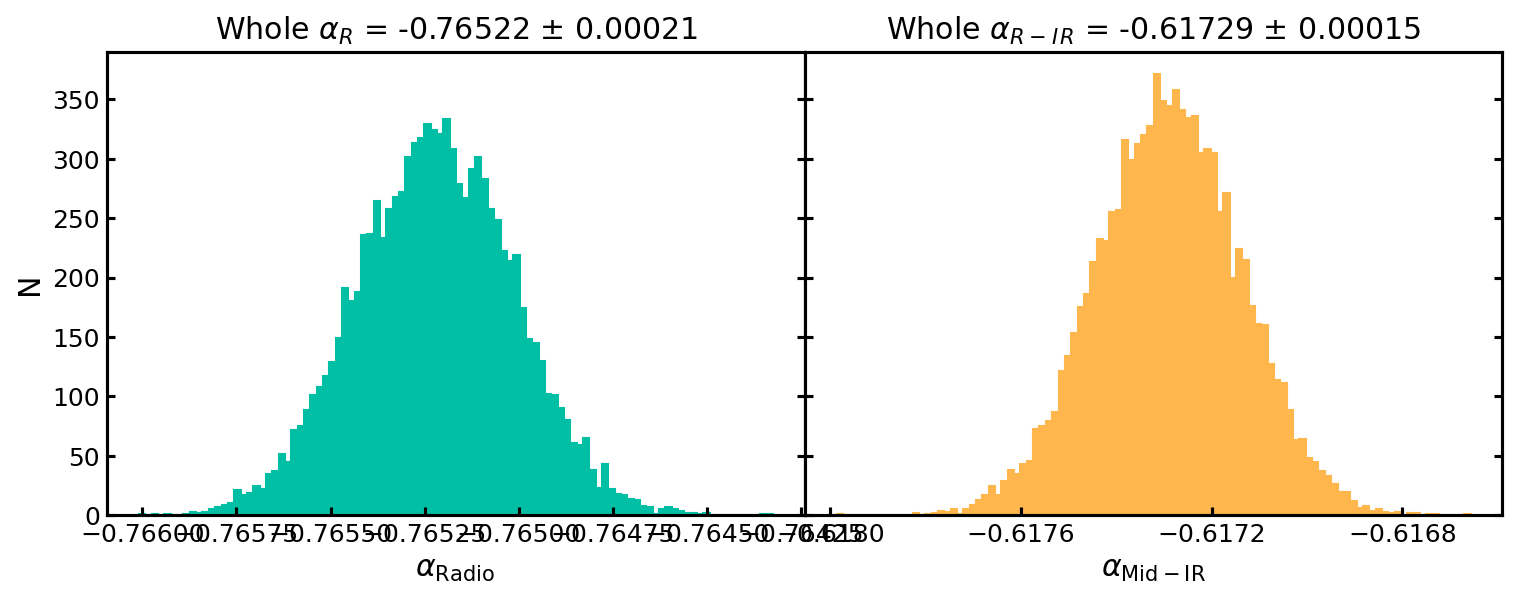

In [31]:
plt.clf()

fig = plt.figure(figsize=(12,9))

ax10 = plt.subplot(221)            
ax10.hist(hist_radio, bins=100,color='#00BFA5', edgecolor='#00BFA5')
ax10.set_title(r'Whole $\alpha _R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_radio), np.nanstd(hist_radio)))
ax10.set_xlabel(r'$\alpha _\mathrm{Radio}$ ',size='x-large')
# ax10.xaxis.set_major_locator(MultipleLocator(0.0004))
ax10.set_ylabel(r'N',size='x-large')

ax20 = plt.subplot(222, sharey = ax10)            
ax20.hist(hist_midIR, bins=100, color='#FFB74D', edgecolor='#FFB74D')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax20.xaxis.set_major_locator(MultipleLocator(0.0004))
ax20.set_title(r'Whole $\alpha _R $$_-$$_I$$_R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR), np.nanstd(hist_midIR)))
ax20.set_xlabel(r'$\alpha _\mathrm{Mid-IR}$',size='x-large')

plt.subplots_adjust(wspace=0.)
plt.setp(ax20.get_yticklabels(), visible=False)
ax10.tick_params(axis='both', which='major', width=1.5, length=4, direction='in', right=True, left=True)
ax20.tick_params(axis='both', which='major', width=1.5, length=4, direction='in',  right=True, left=True)
print('Delta Alpha = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR - hist_radio), np.nanstd(hist_midIR - hist_radio)))

Delta Alpha = 0.00554


<Figure size 900x600 with 0 Axes>

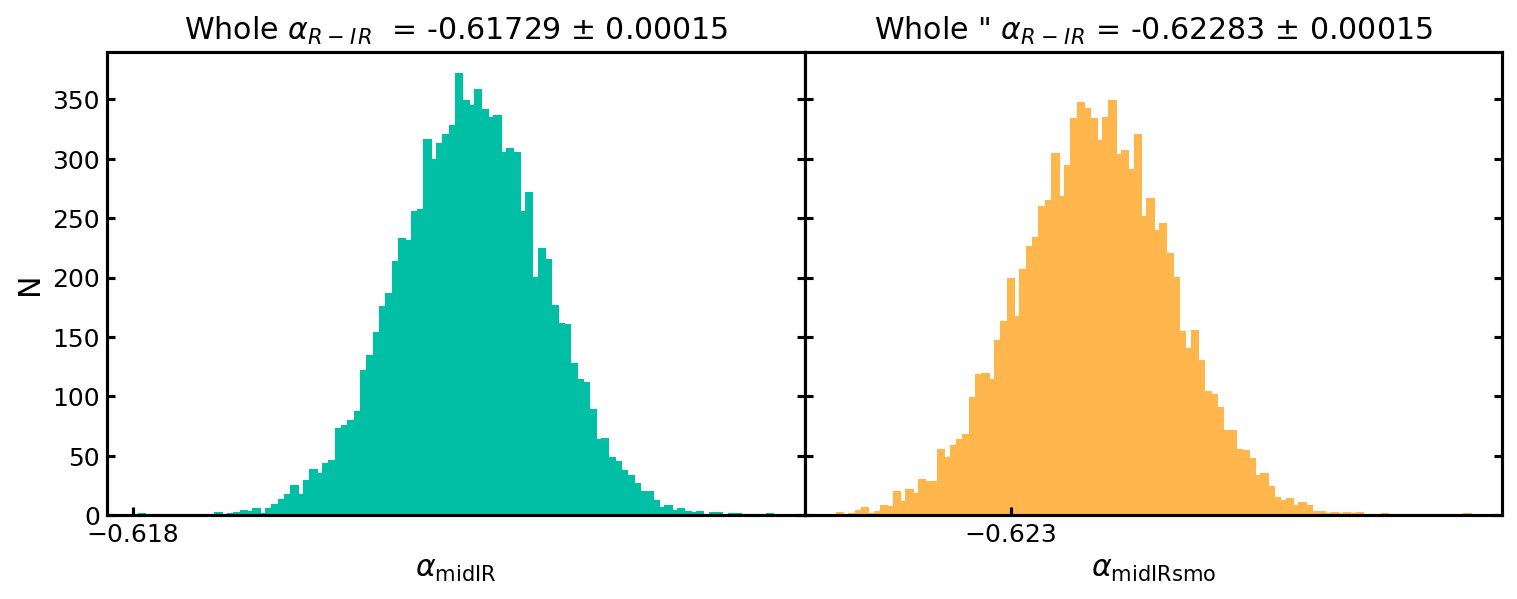

In [32]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.dpi': 150,
          'axes.linewidth': 1.5
         }
plt.rcParams.update(params)

plt.clf()

fig = plt.figure(figsize=(12,9))

ax10 = plt.subplot(221)            
ax10.hist(hist_midIR, bins=100,color='#00BFA5', edgecolor='#00BFA5')
ax10.set_title(r'Whole $\alpha _R$$_-$$_I$$_R$  = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR), np.nanstd(hist_midIR)))
ax10.set_xlabel(r'$\alpha _\mathrm{midIR}$ ',size='x-large')
ax10.xaxis.set_major_locator(MultipleLocator(0.002))
ax10.set_ylabel(r'N',size='x-large')

ax20 = plt.subplot(222, sharey = ax10)            
ax20.hist(hist_midIR_smo, bins=100, color='#FFB74D', edgecolor='#FFB74D')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax20.set_title(r'Whole " $\alpha _R $$_-$$_I$$_R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR_smo), np.nanstd(hist_midIR_smo)))
ax20.set_xlabel(r'$\alpha _\mathrm{midIR smo}$',size='x-large')
ax20.xaxis.set_major_locator(MultipleLocator(0.001))

plt.subplots_adjust(wspace=0.)
plt.setp(ax20.get_yticklabels(), visible=False)
ax10.tick_params(axis='both', which='major', width=1.5, length=4, direction='in', right=True, left=True)
ax20.tick_params(axis='both', which='major', width=1.5, length=4, direction='in',  right=True, left=True)
print('Delta Alpha = {:.5f}'.format(np.nanmedian(hist_midIR - hist_midIR_smo)))

In [33]:
flux_L10_whole_mean, flux_L10_whole_std = np.nanmean(L10_flux_matrix), np.nanstd(L10_flux_matrix)
flux_C10_whole_mean, flux_C10_whole_std = np.nanmean(C10_flux_matrix), np.nanstd(C10_flux_matrix)
flux_hires_whole_mean, flux_hires_whole_std = np.nanmean(hires_flux_matrix), np.nanstd(hires_flux_matrix)
flux_spitzer_whole_mean, flux_spitzer_whole_std = np.nanmean(spitzer_flux_matrix), np.nanstd(spitzer_flux_matrix)

In [34]:
vnu1, vnu2 = frequencies[2:4]
alpha_mean_whole = pl_index(flux_hires_whole_mean, flux_spitzer_whole_mean, vnu1, vnu2)

### South west mask

In [35]:
current_mask = the_mask * south_west_mask
L10_flux_matrix = calc_mean_radio(current_mask, img_L10, img_L10_ferr)
C10_flux_matrix = calc_mean_radio(current_mask, img_C10, img_C10_ferr)
hires_flux_matrix = calc_mean_midir(current_mask, img_Hires, img_Hires_err)
spitzer_flux_matrix = calc_mean_midir(current_mask, img_Spitzer, img_Spitzer_err)

print("Flux L10 = {:.7f} ± {:.7f}".format(np.nanmedian(L10_flux_matrix), np.nanstd(L10_flux_matrix)))
print("Flux C10 = {:.7f} ± {:.7f}".format(np.nanmedian(C10_flux_matrix), np.nanstd(C10_flux_matrix)))
print("Flux Hires = {:.7f} ± {:.7f}".format(np.nanmedian(hires_flux_matrix), np.nanstd(hires_flux_matrix)))
print("Flux Spitzer = {:.7f} ± {:.7f}".format(np.nanmedian(spitzer_flux_matrix), np.nanstd(spitzer_flux_matrix)))

flux1, flux2 = L10_flux_matrix, C10_flux_matrix
vnu1, vnu2 = frequencies[0:2]
hist_radio = pl_index(flux1,flux2,vnu1,vnu2)

flux1, flux2 = hires_flux_matrix, spitzer_flux_matrix
vnu1, vnu2 = frequencies[2:4]
hist_midIR = pl_index(flux1,flux2,vnu1,vnu2)

Flux L10 = 0.0655799 ± 0.0000250
Flux C10 = 0.0243211 ± 0.0000072
Flux Hires = 0.0213920 ± 0.0000294
Flux Spitzer = 0.0000599 ± 0.0000002


Delta Alpha = 0.17148 ± 0.00052


<Figure size 900x600 with 0 Axes>

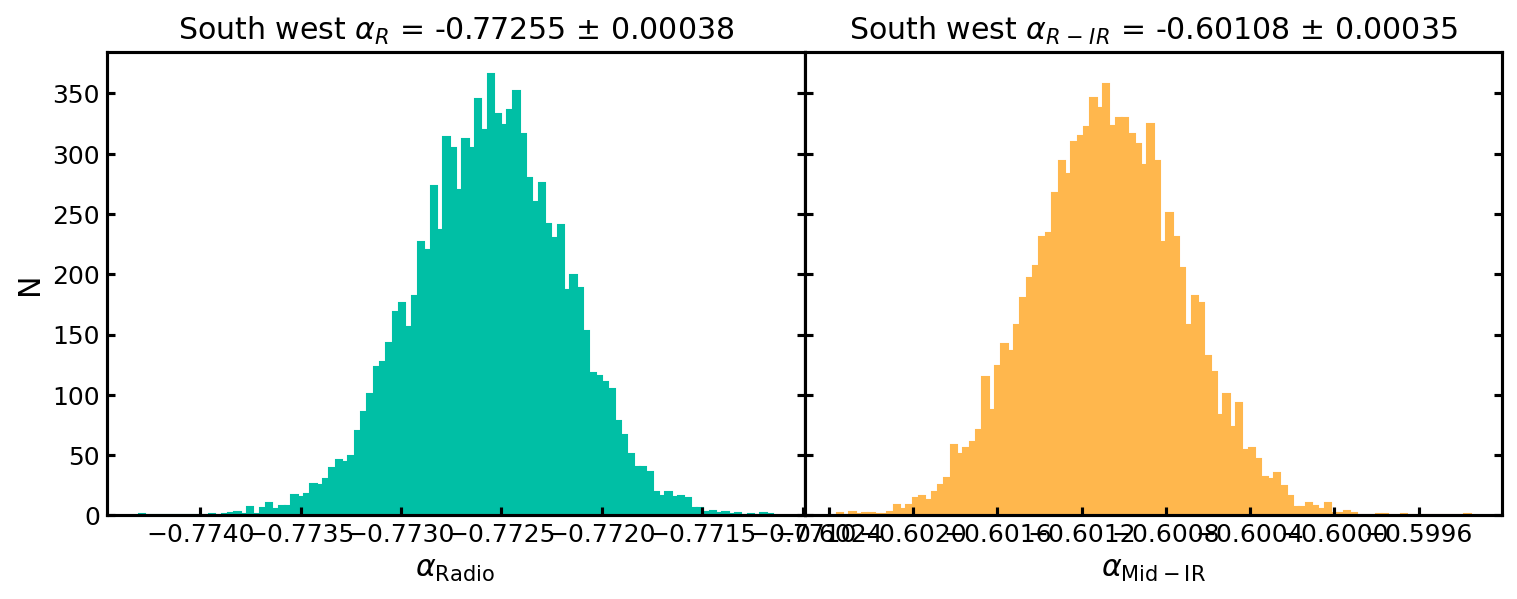

In [36]:
plt.clf()

fig = plt.figure(figsize=(12,9))

ax10 = plt.subplot(221)            
ax10.hist(hist_radio, bins=100,color='#00BFA5', edgecolor='#00BFA5')
ax10.set_title(r'South west $\alpha _R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_radio), np.nanstd(hist_radio)))
ax10.set_xlabel(r'$\alpha _\mathrm{Radio}$ ',size='x-large')
# ax10.xaxis.set_major_locator(MultipleLocator(0.0004))
ax10.set_ylabel(r'N',size='x-large')

ax20 = plt.subplot(222, sharey = ax10)            
ax20.hist(hist_midIR, bins=100, color='#FFB74D', edgecolor='#FFB74D')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax20.xaxis.set_major_locator(MultipleLocator(0.0004))
ax20.set_title(r'South west $\alpha _R $$_-$$_I$$_R$ = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR), np.nanstd(hist_midIR)))
ax20.set_xlabel(r'$\alpha _\mathrm{Mid-IR}$',size='x-large')

plt.subplots_adjust(wspace=0.)
plt.setp(ax20.get_yticklabels(), visible=False)
ax10.tick_params(axis='both', which='major', width=1.5, length=4, direction='in', right=True, left=True)
ax20.tick_params(axis='both', which='major', width=1.5, length=4, direction='in',  right=True, left=True)

print('Delta Alpha = {:.5f} ± {:.5f}'.format(np.nanmedian(hist_midIR - hist_radio), np.nanstd(hist_midIR - hist_radio)))

In [37]:
flux_L10_sw_mean, flux_L10_sw_std = np.nanmean(L10_flux_matrix), np.nanstd(L10_flux_matrix)
flux_C10_sw_mean, flux_C10_sw_std = np.nanmean(C10_flux_matrix), np.nanstd(C10_flux_matrix)
flux_hires_sw_mean, flux_hires_sw_std = np.nanmean(hires_flux_matrix), np.nanstd(hires_flux_matrix)
flux_spitzer_sw_mean, flux_spitzer_sw_std = np.nanmean(spitzer_flux_matrix), np.nanstd(spitzer_flux_matrix)

In [38]:
vnu1, vnu2 = frequencies[2:4]
alpha_mean_sw = pl_index(flux_hires_sw_mean, flux_spitzer_sw_mean, vnu1, vnu2)

### Saving flux data

In [39]:
frequncies = np.asarray(frequencies)
flux_whole = np.array([flux_L10_whole_mean, flux_C10_whole_mean, flux_hires_whole_mean, flux_spitzer_whole_mean])
flux_se = np.array([flux_L10_south_east_mean, flux_C10_south_east_mean, flux_hires_south_east_mean, flux_spitzer_south_east_mean])
flux_arc = np.array([flux_L10_arc_mean, flux_C10_arc_mean,flux_hires_arc_mean,flux_spitzer_arc_mean])
flux_or = np.array([flux_L10_outer_rim_mean, flux_C10_outer_rim_mean,flux_hires_outer_rim_mean,flux_spitzer_outer_rim_mean])
flux_sw = np.array([flux_L10_sw_mean, flux_C10_sw_mean, flux_hires_sw_mean, flux_spitzer_sw_mean])
names = np.array(['frequency', 'whole_remnant', 'southeast', 'northern_arc', 'outer_rim', 'shouthwest'])
arr_flux = np.array([frequncies, flux_whole, flux_se, flux_arc, flux_or, flux_sw])
arr_flux = np.transpose(arr_flux)
f = open('figures/SED_raw.dat', 'w+')

f.write('# ')
for name in names:
    f.write(str(name)+'\t')
f.write('\n')
for subarray in arr_flux:  
    for element in subarray: f.write(str(element)+'\t')
    f.write('\n')
f.close()
print(arr_flux)

[[1.28500000e+09 5.86103259e-02 5.69066312e-02 6.54679733e-02
  3.69798467e-02 6.55803912e-02]
 [4.64000000e+09 2.19419634e-02 2.09154883e-02 2.42292109e-02
  1.36236606e-02 2.43211223e-02]
 [4.72000000e+09 1.96029332e-02 1.94511453e-02 2.15068724e-02
  1.30023204e-02 2.13926174e-02]
 [8.32756828e+13 4.68762885e-05 3.12011552e-05 4.20958009e-05
  3.41054526e-05 5.99450799e-05]]


<Figure size 900x600 with 0 Axes>

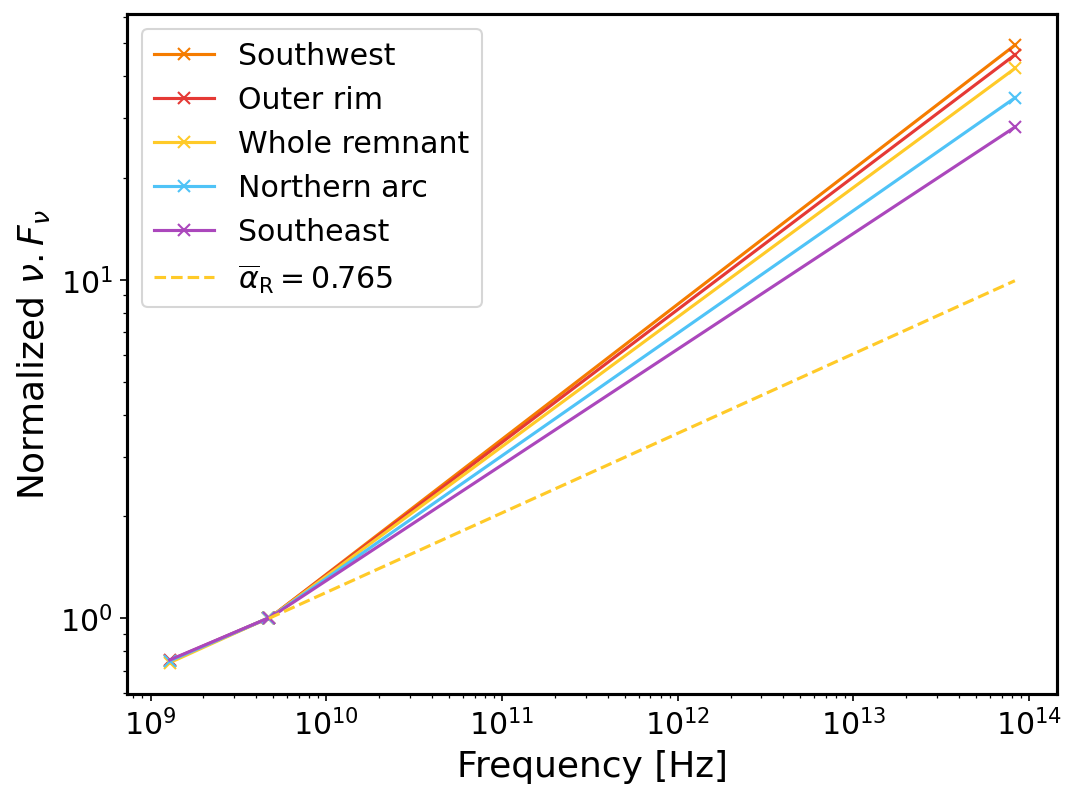

In [40]:
# sed_whole_remnant = [mean_radio_flux_whole, mean_spitzer_flux_whole]
plt.clf()
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
         }
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(8,6),dpi=150)
# ax.plot(frequencies, frequencies*np.array([flux_L10_dark_spot_mean, flux_C10_dark_spot_mean, flux_hires_dark_spot_mean, flux_spitzer_dark_spot_mean])*(1/(flux_hires_dark_spot_mean*frequencies[2])), label='Dark spot', color='#1E88E5')

ax.plot(frequencies[2:], frequencies[2:]*np.array([flux_hires_sw_mean, flux_spitzer_sw_mean])*(1/(flux_hires_sw_mean*frequencies[2])), '-x',ms=6, label = 'Southwest', color="#F57C00")
ax.plot(frequencies[:2], frequencies[:2]*np.array([flux_L10_sw_mean, flux_C10_sw_mean])*(1/(flux_C10_sw_mean*frequencies[1])), '-x',ms=6, color="#F57C00")

ax.plot(frequencies[2:], frequencies[2:]*np.array([flux_hires_outer_rim_mean, flux_spitzer_outer_rim_mean])*(1/(flux_hires_outer_rim_mean*frequencies[2])), '-x',ms=6, label='Outer rim', color='#e53935')
ax.plot(frequencies[:2], frequencies[:2]*np.array([flux_L10_outer_rim_mean, flux_C10_outer_rim_mean])*(1/(flux_C10_outer_rim_mean*frequencies[1])), '-x',ms=6, color='#e53935')

ax.plot(frequencies[2:], frequencies[2:]*np.array([flux_hires_whole_mean, flux_spitzer_whole_mean])*(1/(flux_hires_whole_mean*frequencies[2])), '-x',label = 'Whole remnant', color="#FFCA28")
ax.plot(frequencies[:2], frequencies[:2]*np.array([flux_L10_whole_mean, flux_C10_whole_mean])*(1/(flux_C10_whole_mean*frequencies[1])), '-x', color="#FFCA28")

ax.plot(frequencies[2:], frequencies[2:]*np.array([flux_hires_arc_mean,flux_spitzer_arc_mean])*(1/(flux_hires_arc_mean*frequencies[2])), '-x',ms=6, label='Northern arc', color='#4FC3F7')
ax.plot(frequencies[:2], frequencies[:2]*np.array([flux_L10_arc_mean, flux_C10_arc_mean])*(1/(flux_C10_arc_mean*frequencies[1])), '-x',ms=6, color='#4FC3F7')

ax.plot(frequencies[2:], frequencies[2:]*np.array([flux_hires_south_east_mean, flux_spitzer_south_east_mean])*(1/(flux_hires_south_east_mean*frequencies[2])), '-x',ms=6, label='Southeast', color='#AB47BC')
ax.plot(frequencies[:2], frequencies[:2]*np.array([flux_L10_south_east_mean, flux_C10_south_east_mean])*(1/(flux_C10_south_east_mean*frequencies[1])), color='#AB47BC')



# ax.fill_between(frequencies, [flux_L10_dark_spot_mean-flux_L10_dark_spot_mean_err, flux_L10_dark_spot_mean-flux_L10_dark_spot_mean_err], [flux_L10_dark_spot_mean+flux_L10_dark_spot_mean_err, flux_L10_dark_spot_mean+flux_L10_dark_spot_mean_err],alpha=0.5)

y1=1
f1=4.72e9
a = y1/f1**(-0.765)
f2 = 8.3e13
y2 = a*f2**(-0.765)

ax.plot(np.asarray([f1,f2]), np.asarray([f1,f2])*np.array([y1, y2])*(1/(y1*f1)), '--',label = r'$\overline{\alpha} _\mathrm{R} = 0.765$', color="#FFCA28")



ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'Normalized $\nu . F_{\nu}$')
# plt.xlim(2e9,5e9)
# plt.ylim(0.2,1)
plt.legend()
# plt.savefig(casapath+'/monte_carlo/fig_SED.pdf',bbox_inches='tight')


# Fig.8 - Histogram + SED

In [41]:
alpha_whole = alpha_R_IR * the_mask
alpha_outer_rim = alpha_R_IR * outer_rim_mask
alpha_arc = alpha_R_IR * arc_mask
alpha_southeast = alpha_R_IR * south_east_mask
alpha_southwest = alpha_R_IR * south_west_mask

In [42]:
bins2= [-0.75+0.005*i for i in range(300)]

<Figure size 900x600 with 0 Axes>

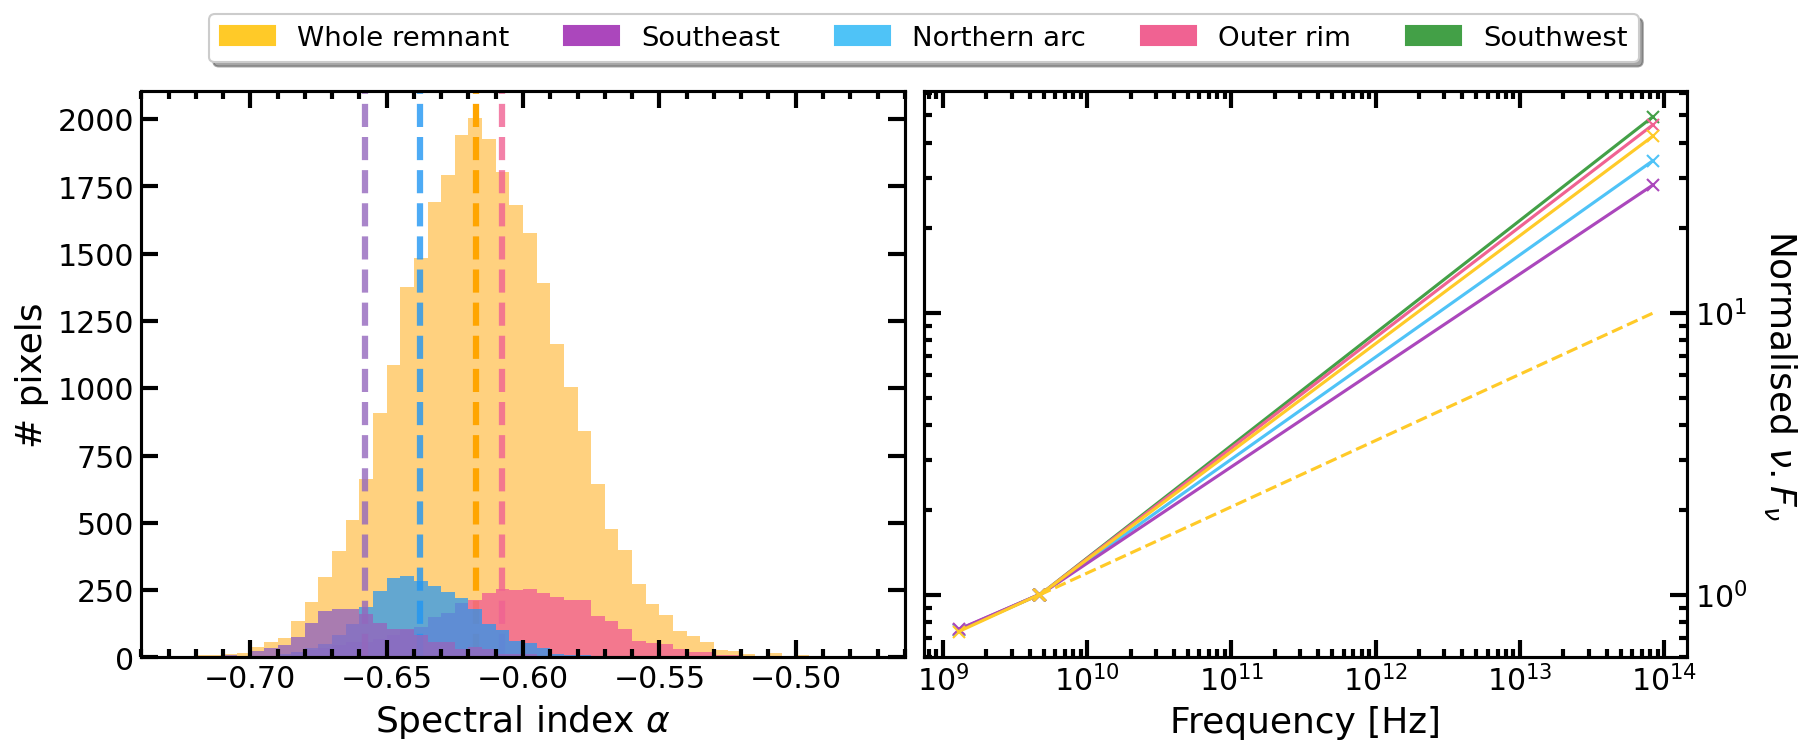

In [45]:
import matplotlib.ticker as ticker

plt.clf()
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'figure.dpi': 150,
          'axes.linewidth': 1.5,
          "patch.force_edgecolor": False
         }
plt.rcParams.update(params)


whole_color= 'orange'
arc_color='#2196F3'
se_color = 'C4'
fot = '#F06292'

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(13.3,5),dpi=150)

# Values of means are from the casa_SED flux density calculation
ax.axvline(alpha_mean_whole, color=whole_color, zorder=0.11, lw=3, ls='--')
ax.hist(alpha_whole[~np.isnan(alpha_whole)],bins2,alpha=0.5,label='Whole remnant',color=whole_color, edgecolor=None, zorder=0.10)

ax.axvline(alpha_mean_or, color=or_color, zorder=0.21, lw=3, alpha=0.8, ls='--')
ax.hist(alpha_outer_rim[~np.isnan(alpha_outer_rim)],bins2, alpha=0.8,label='Outer rim',color=or_color, edgecolor=None, zorder=0.20)

ax.axvline(alpha_mean_arc, color=arc_color, zorder=0.31, lw=3, alpha=0.8, ls='--')
ax.hist(alpha_arc[~np.isnan(alpha_arc)],bins2, alpha=0.7,label='Northern arc',color=arc_color, edgecolor=None, zorder=0.30)

ax.axvline(alpha_mean_se, color=se_color, zorder=0.41, lw=3, alpha=0.8, ls='--')
ax.hist(alpha_southeast[~np.isnan(alpha_southeast)],bins2, alpha=0.8,label='Southeast',color=se_color, edgecolor=None, zorder=0.40)

ax.tick_params(axis='x', which='major', width=2.00, length=8, direction = 'in', labelsize='x-large', top=True,
               bottom=True)
ax.tick_params(axis='y', which='major', width=2.00, length=8, direction = 'in', labelsize='x-large', right=True,
               left=True)
ax.tick_params(axis='both', which='minor', width=2, length=4, top=True, direction = 'in')

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))

ax.set_yscale('linear')
# ax.legend()
ax.set_xlim(-0.74,-0.46)
ax.set_xlabel(r'Spectral index $\alpha$')
ax.set_ylabel('# pixels')


plt.subplots_adjust(wspace=0.025)


ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))


ax2.plot(frequencies[2:], frequencies[2:]*flux_sw[2:]*(1/(flux_sw[2]*frequencies[2])), '-x',ms=6, label = 'Southwest', color="#43A047")
ax2.plot(frequencies[:2], frequencies[:2]*flux_sw[:2]*(1/(flux_sw[1]*frequencies[1])), '-x',ms=6, color="#66BB6A")

ax2.plot(frequencies[2:], frequencies[2:]*flux_or[2:]*(1/(flux_or[2]*frequencies[2])), '-x',ms=6, label = 'Outer rim', color="#F06292")
ax2.plot(frequencies[:2], frequencies[:2]*flux_or[:2]*(1/(flux_or[1]*frequencies[1])), '-x',ms=6, color="#F06292")

ax2.plot(frequencies[2:], frequencies[2:]*flux_arc[2:]*(1/(flux_arc[2]*frequencies[2])), '-x',ms=6, label = 'Northern arc', color="#4FC3F7")
ax2.plot(frequencies[:2], frequencies[:2]*flux_arc[:2]*(1/(flux_arc[1]*frequencies[1])), '-x',ms=6, color="#4FC3F7")

ax2.plot(frequencies[2:], frequencies[2:]*flux_se[2:]*(1/(flux_se[2]*frequencies[2])), '-x',ms=6, label = 'Southeast', color="#AB47BC")
ax2.plot(frequencies[:2], frequencies[:2]*flux_se[:2]*(1/(flux_se[1]*frequencies[1])), '-x',ms=6, color="#AB47BC")

ax2.plot(frequencies[2:], frequencies[2:]*flux_whole[2:]*(1/(flux_whole[2]*frequencies[2])), '-x',ms=6, label = 'Whole remnant', color="#FFCA28")
ax2.plot(frequencies[:2], frequencies[:2]*flux_whole[:2]*(1/(flux_whole[1]*frequencies[1])), '-x',ms=6, color="#FFCA28")

y1=1
f1=4.72e9
a = y1/f1**(-0.765)
f2 = 8.3e13
y2 = a*f2**(-0.765)

ax2.plot(np.asarray([f1,f2]), np.asarray([f1,f2])*np.array([y1, y2])*(1/(y1*f1)), '--',label = r'$\overline{\alpha} _\mathrm{R} = 0.765$', color="#FFCA28")

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel(r'Normalised $\nu . F_{\nu}$', rotation=270, labelpad=25)

ax2.tick_params(axis='x', which='major', width=2.00, length=8, direction='in', labelsize='x-large', top=True,
               bottom=True)
ax2.tick_params(axis='y', which='major', width=2.00, length=8, direction='in', labelsize='x-large', right=True,
               left=True, labelleft=False, labelright=True)
ax2.tick_params(axis='both', which='minor', width=2.00, length=4, direction='in', top=True, right=True)
ax2.yaxis.set_label_position("right")

whole_patch = mpatches.Patch(color='#FFCA28', label='Whole remnant')
outer_rim_patch = mpatches.Patch(color='#F06292', label='Outer rim')
arc_patch = mpatches.Patch(color='#4FC3F7', label='Northern arc')
southeast_patch = mpatches.Patch(color='#AB47BC', label='Southeast')
southwest_patch = mpatches.Patch(color='#43A047', label='Southwest')

plt.legend(handles=[whole_patch, southeast_patch, arc_patch, outer_rim_patch, southwest_patch], ncol=5, loc='upper center', bbox_to_anchor=(0., +1.16),
          fancybox=True, shadow=True, fontsize=13.2)


plt.savefig('figures/fig9_hist_and_SED.pdf',bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()